Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

---

Answer:

1. Definition of Boosting

Boosting is an ensemble learning technique that combines multiple weak learners to form a strong learner.

A weak learner is a model that performs slightly better than random guessing, like a shallow decision tree.

2. How Boosting Works

Boosting trains weak learners sequentially, not in parallel.

Each new learner focuses on the mistakes of the previous learners by giving more weight to the misclassified data points.

The predictions of all weak learners are then combined (weighted sum or majority vote) to make the final prediction.

3. Improving Weak Learners

By emphasizing misclassified samples, Boosting forces weak learners to correct errors step by step.

As more learners are added, the ensemble becomes more accurate than any individual weak learner.

This reduces bias and increases predictive performance.

4. Popular Boosting Algorithms

AdaBoost: Adjusts weights of training samples to focus on hard-to-classify points.

Gradient Boosting: Optimizes a loss function by sequentially adding models to minimize errors.

XGBoost / LightGBM / CatBoost: Efficient implementations of gradient boosting with regularization and speed optimizations.

5. Example

Suppose a weak decision tree predicts loan default with 60% accuracy.

Boosting will train additional trees to focus on the 40% misclassified cases.

After combining 50 trees, the final model could achieve 90%+ accuracy, much stronger than any single tree.

---



---



Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

---

Answer:

1. AdaBoost (Adaptive Boosting)

Sequential Training: Models (weak learners) are trained one after another.

Focus on Misclassified Samples: After each weak learner, weights of misclassified samples are increased, so the next learner focuses more on difficult cases.

Weighted Voting: Final predictions are made by combining all weak learners with weights proportional to their accuracy.

Key Idea: Adjust sample weights to correct mistakes from previous learners.

2. Gradient Boosting

Sequential Training: Models are trained one after another, like AdaBoost.

Focus on Residuals (Errors): Each new model is trained to predict the residuals (errors) of the previous model rather than reweighting samples.

Additive Model: Predictions are updated by adding the new model’s output to the ensemble.

Key Idea: Treat boosting as gradient descent optimization, minimizing a specified loss function (e.g., MSE for regression, log-loss for classification).

Example

AdaBoost: If a tree misclassifies 10% of loan applications, the next tree gives those 10% more weight to correct them.

Gradient Boosting: If a tree predicts loan amounts with errors, the next tree is trained to predict those errors (residuals), improving overall predictions.


---



---



Question 3: How does regularization help in XGBoost?

---

Answer:

1. Definition of Regularization in XGBoost

Regularization in XGBoost is a technique to penalize model complexity, making the model simpler and less prone to overfitting.

XGBoost uses both L1 (Lasso) and L2 (Ridge) regularization on the weights of the leaf nodes in each tree.

2. How Regularization Works

L1 Regularization (alpha): Encourages sparsity by pushing some leaf weights to zero, effectively removing less important features.

L2 Regularization (lambda): Penalizes large leaf weights, preventing extreme predictions and overfitting.

Regularization also includes a complexity penalty (gamma) for adding more splits in a tree, encouraging shallower trees if deeper splits don’t reduce loss significantly.

3. Benefits

Reduces Overfitting: Prevents trees from becoming too complex and memorizing noise in the training data.

Improves Generalization: Helps the model perform better on unseen/test data.

Feature Selection: L1 regularization can effectively ignore irrelevant features.

Controls Tree Growth: Gamma parameter discourages unnecessary splits, keeping the model simpler.

4. Example

Without regularization: XGBoost may grow very deep trees predicting loan defaults perfectly on training data, but fails on new applicants.

With regularization (alpha=0.1, lambda=1, gamma=0.2): Trees are slightly shallower, leaf weights are constrained, and predictions generalize better to unseen customers.

---



---



Question 4: Why is CatBoost considered efficient for handling categorical data?

---

Answer:

1. Native Support for Categorical Features

CatBoost can directly process categorical variables without manually converting them into numeric forms like one-hot encoding or label encoding.

This reduces preprocessing time and avoids dimensionality explosion from one-hot encoding.

2. Ordered Target Statistics

CatBoost converts categorical features into numbers using target-based statistics (mean encoding).

To prevent data leakage, it uses an ordered boosting algorithm where each row is encoded based only on previous rows in the training set.

3. Reduces Overfitting

By using smarter encoding and gradient boosting with ordered boosting, CatBoost prevents overfitting common in naive encoding approaches.

4. Efficient Computation

CatBoost uses symmetric trees and histogram-based algorithms, which speeds up training and reduces memory usage.

It can handle high-cardinality categorical features efficiently.

5. Example

Dataset: predicting loan default with features like education_level, job_type, marital_status.

Other models: require one-hot encoding, creating many extra columns.

CatBoost: can directly use these features, encode them internally, and train the model efficiently without preprocessing headaches.

---



---



Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

---
Answer:

1. Credit Risk & Loan Default Prediction

Scenario: Predicting whether a customer will default on a loan.

Why Boosting: Boosting methods (like XGBoost or LightGBM) can capture complex patterns and subtle interactions in customer demographics, credit history, and transaction behavior.

Advantage over Bagging: Bagging (e.g., Random Forest) reduces variance but may underfit subtle patterns in imbalanced financial datasets.

2. Fraud Detection

Scenario: Detecting fraudulent transactions in banking or e-commerce.

Why Boosting: Fraudulent cases are rare (highly imbalanced), and boosting focuses on misclassified samples, improving detection of rare events.

Advantage: Bagging treats all samples equally, so it may miss rare but important fraudulent cases.

3. Marketing & Customer Churn Prediction

Scenario: Predicting whether a customer will leave a subscription service.

Why Boosting: Boosting sequentially learns from mistakes, capturing subtle signals in behavior patterns.

Advantage: Boosting achieves higher predictive accuracy in datasets with complex interactions, compared to bagging.

4. Healthcare & Disease Prediction

Scenario: Predicting diseases like diabetes or heart conditions based on patient records.

Why Boosting: Can handle heterogeneous features (categorical, continuous) and focus on misdiagnosed cases to improve accuracy.

5. Recommendation Systems

Scenario: Predicting user preferences or ratings.

Why Boosting: Can model non-linear interactions between users and items more effectively than simple bagging ensembles.

---



---




Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

---



In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", round(accuracy, 4))


AdaBoost Classifier Accuracy: 0.9708


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

---



In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", round(r2, 4))


Gradient Boosting Regressor R-squared Score: 0.7803


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

---



In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Classifier (updated)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid search for learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred), 4))


Best Learning Rate: 0.3
Test Set Accuracy: 0.9649


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

---



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00
CatBoost Accuracy: 0.9766


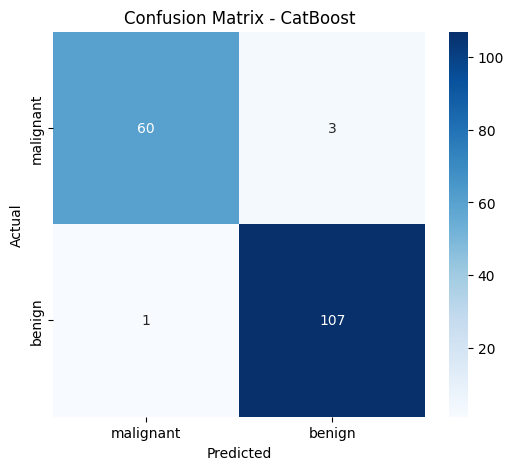

In [6]:
!pip install catboost --quiet


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost
catboost_model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=3, verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = catboost_model.predict(X_test)
print("CatBoost Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)


---

Answer:

Step 1: Data Preprocessing

Handle missing values:

For numeric features: fill with median/mean.

For categorical features: fill with mode or “Unknown”.

Encode categorical features:

Use CatBoost or target encoding / one-hot encoding.

CatBoost can handle categorical features natively.

Feature scaling:

Boosting trees (XGBoost, CatBoost, AdaBoost) do not require scaling, so we can skip standardization.

Handle imbalanced data:

Use class weights or SMOTE to oversample the minority class.

Boosting methods like XGBoost/CatBoost allow scale_pos_weight for imbalanced classes.

Step 2: Choice of Boosting Algorithm

Algorithm	Reason to Use

AdaBoost	Simple boosting, sensitive to outliers

XGBoost	Fast, supports regularization, handles missing values

CatBoost	Handles categorical features natively, robust to overfitting, good for tabular data

 For mixed numeric + categorical features in imbalanced data, CatBoost is ideal.

Step 3: Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV.

Important hyperparameters for CatBoost:

iterations: number of trees

learning_rate: step size for boosting

depth: maximum depth of trees

l2_leaf_reg: L2 regularization

scale_pos_weight: for imbalanced classes

Step 4: Evaluation Metrics

Since the dataset is imbalanced, accuracy alone is misleading. Use:

ROC-AUC → evaluates overall classifier performance

F1-score → balances precision and recall

Confusion Matrix → shows TP, FP, TN, FN

Step 5: Business Impact

Better loan approval decisions → fewer defaults

Risk-based pricing → adjust interest rates based on predicted risk

Targeted interventions → identify high-risk customers and offer financial counseling

ROC-AUC: 0.4944

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       256
           1       0.12      0.14      0.13        44

    accuracy                           0.73       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.74      0.73      0.73       300



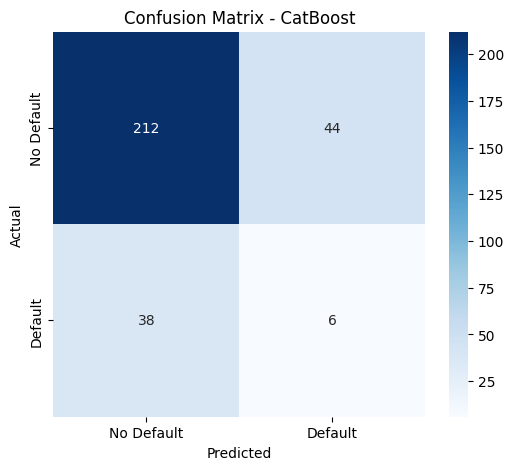

In [10]:
# Install CatBoost if not already installed
!pip install catboost --quiet

# Imports
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated FinTech dataset (replace with your real data)
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(21, 70, 1000),
    'income': np.random.randint(20000, 150000, 1000),
    'loan_amount': np.random.randint(1000, 50000, 1000),
    'job_type': np.random.choice(['salaried', 'self-employed'], 1000),
    'education': np.random.choice(['high_school', 'bachelor', 'master'], 1000),
    'default': np.random.choice([0,1], 1000, p=[0.85,0.15])  # Imbalanced
})

# Define features and target
X = data.drop('default', axis=1)
y = data['default']

# Identify categorical features
cat_features = ['job_type','education']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Compute scale_pos_weight for imbalance
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# Train CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    l2_leaf_reg=3,
    eval_metric='AUC',
    random_state=42,
    verbose=0,
    scale_pos_weight=pos_weight
)

cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:,1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", round(roc_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()
